# Assessing the Impact of Daylight Savings Time on Driving Fatalities

- Anastasiades, Andrew
- Drozdzewicz, Peter
- Garcia, Viera
- Sperry, Taylor
- Surapanemi, Sindhura

### DEPENDENCIES

In [1]:
import pandas as pd #data manipulation
import os #Interoperability
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import datetime as dt

### FILE PATHS

In [2]:
accident_csv = os.path.join("Resources", "2018.csv")


### LOAD DATAFRAME

In [3]:
raw_df = pd.read_csv(accident_csv)
raw_df.columns

Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR',
       'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'NHS', 'NHSNAME', 'ROUTE', 'ROUTENAME', 'TWAY_ID', 'TWAY_ID2',
       'RUR_URB', 'RUR_URBNAME', 'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER',
       'RD_OWNERNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE', 'LATITUDENAME',
       'LONGITUD', 'LONGITUDNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV',
       'HARM_EVNAME', 'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT2', 'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE',
       'WRK_ZONENAME', 'REL_ROAD', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME',
       'WEATHER1', 'WEATHER1NAME', 'WEATHER2', 'WEATHER2NAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT

In [4]:
columns_to_keep = ['STATENAME', 'DAY', 'MONTH','YEAR','HOUR','DAY_WEEK','DAY_WEEKNAME', 'LGT_CONDNAME',
                   'DRUNK_DR', 'WEATHERNAME', 'RUR_URBNAME', 'FATALS',]
df = pd.read_csv(accident_csv, usecols=columns_to_keep)

### CLEAN DATAFRAME

In [5]:
# EXCLUDE DRUNK DRIVERS
df = df[df["DRUNK_DR"]==0] 
df.drop(axis=1, labels=["DRUNK_DR"], inplace=True)

In [6]:
# ADD DATE AND WEEKNUM
df["DATE"] = pd.to_datetime(df[["YEAR", "MONTH", "DAY"]])
#df["WEEK_NUM"] = df["DATE"].dt.week
df['WEEK_NUM'] = df['DATE'].apply(lambda x: (x + dt.timedelta(days=1)).week)

In [7]:
# SPLIT SAMPLE AND CONTROL
control_states = ["Arizona", "Hawaii"] #These states do not observe DLS
control_df = df[df.loc[:,'STATENAME'].isin(control_states)] #NO DLS
sample_df = df[~df.loc[:,'STATENAME'].isin(control_states)] #

In [8]:
sample_df

,STATENAME,DAY,MONTH,YEAR,DAY_WEEK,DAY_WEEKNAME,HOUR,RUR_URBNAME,LGT_CONDNAME,WEATHERNAME,FATALS,DATE,WEEK_NUM
0,Alabama,5,1,2018,6,Friday,6,Rural,Dawn,Clear,1,2018-01-05,1
1,Alabama,8,1,2018,2,Monday,0,Urban,Dark - Not Lighted,Rain,2,2018-01-08,2
2,Alabama,8,1,2018,2,Monday,22,Rural,Dark - Not Lighted,Cloudy,1,2018-01-08,2
3,Alabama,9,1,2018,3,Tuesday,13,Rural,Daylight,Cloudy,1,2018-01-09,2
4,Alabama,19,1,2018,6,Friday,7,Urban,Daylight,Clear,1,2018-01-19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33911,Wyoming,8,10,2018,2,Monday,4,Rural,Dark - Not Lighted,Snow,1,2018-10-08,41
33912,Wyoming,5,12,2018,4,Wednesday,18,Rural,Dark - Not Lighted,Snow,1,2018-12-05,49
33913,Wyoming,15,12,2018,7,Saturday,14,Rural,Daylight,Clear,1,2018-12-15,50
33915,Wyoming,26,12,2018,4,Wednesday,10,Rural,Daylight,Sleet or Hail,1,2018-12-26,52


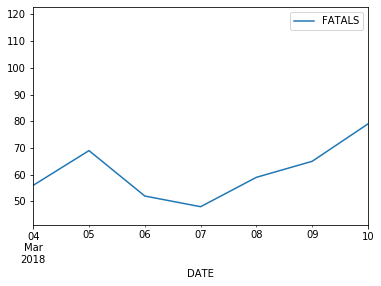

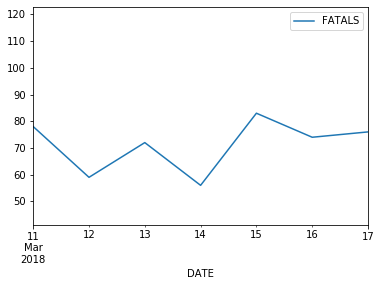

In [9]:
# this includes 48 states with DLS 
# week before 
start_date = '2018-03-04'
end_date = '2018-03-10'

sample_gb = sample_df.groupby("DATE")
summary = pd.DataFrame(sample_gb["FATALS"].sum())
summary.reset_index(inplace=True)
summary.plot(x="DATE", y="FATALS", kind="line")
plt.xlim(start_date, end_date)
plt.show()

# week after DLS
start_date = '2018-03-11'
end_date = '2018-03-17'
summary.plot(x="DATE", y="FATALS", kind="line")
plt.xlim(start_date, end_date)
plt.show()

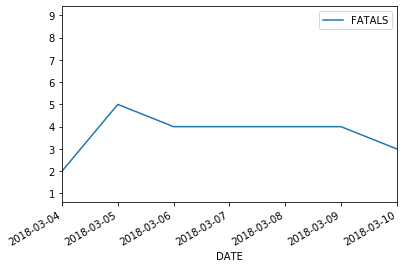

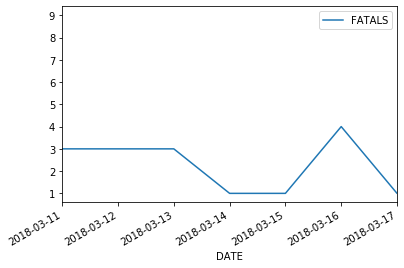

In [10]:
# this is only HI and AZ without DLS
# week before 
start_date = '2018-03-04'
end_date = '2018-03-10'

sample_gb = control_df.groupby("DATE")
summary = pd.DataFrame(sample_gb["FATALS"].sum())
summary.reset_index(inplace=True)
summary.plot(x="DATE", y="FATALS", kind="line")
plt.xlim(start_date, end_date)
plt.show()

# week after 
start_date = pd.to_datetime('2018-03-11')
end_date = pd.to_datetime('2018-03-17')

sample_gb = control_df.groupby("DATE")
summary = pd.DataFrame(sample_gb["FATALS"].sum())
summary.reset_index(inplace=True)
summary.plot(x="DATE", y="FATALS", kind="line")
plt.xlim(start_date, end_date)
plt.show()

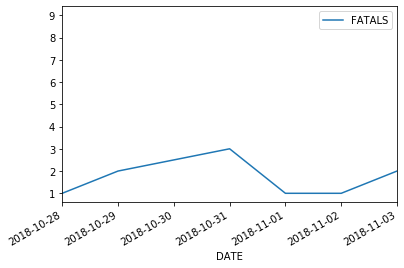

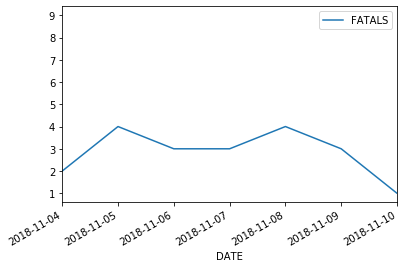

In [11]:
# now for November

# This is only AZ and HI without DLS

# week before
start_date = pd.to_datetime('2018-10-28')
end_date = pd.to_datetime('2018-11-03')

sample_gb = control_df.groupby("DATE")
summary = pd.DataFrame(sample_gb["FATALS"].sum())
summary.reset_index(inplace=True)
summary.plot(x="DATE", y="FATALS", kind="line")
plt.xlim(start_date, end_date)
plt.show()

# week after
start_date = pd.to_datetime('2018-11-04')
end_date = pd.to_datetime('2018-11-10')

sample_gb = control_df.groupby("DATE")
summary = pd.DataFrame(sample_gb["FATALS"].sum())
summary.reset_index(inplace=True)
summary.plot(x="DATE", y="FATALS", kind="line")
plt.xlim(start_date, end_date)
plt.show()

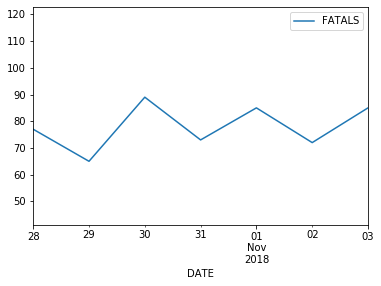

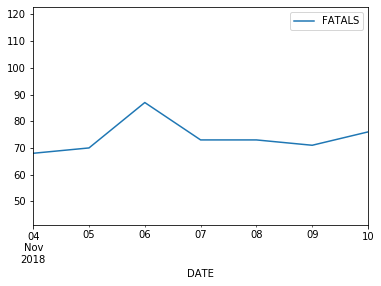

In [12]:
# This includes 48 states with DLS

# week before 
start_date = '2018-10-28'
end_date = '2018-11-03'

sample_gb = sample_df.groupby("DATE")
summary = pd.DataFrame(sample_gb["FATALS"].sum())
summary.reset_index(inplace=True)
summary.plot(x="DATE", y="FATALS", kind="line")
plt.xlim(start_date, end_date)
plt.show()

# week after DLS
start_date = '2018-11-04'
end_date = '2018-11-10'
summary.plot(x="DATE", y="FATALS", kind="line")
plt.xlim(start_date, end_date)
plt.show()

### REVIEW WEEK-OVER-WEEK CHANGE IN FATALITIES

In [24]:
from scipy.stats import norm
week_gb = sample_df.groupby(by=["WEEK_NUM"])
week_summary = pd.DataFrame(week_gb["FATALS"].sum())
#week_summary["WEEKLY_CHANGE"]
weekly_change = []

for index, row in week_summary.iterrows(): # WE WANT DELTA! FOR EACH WEEK
    if index==1:
        weekly_change.append(np.nan)
    else:
        this_num = week_summary.loc[index, "FATALS"] # FATALITIES FROM THIS WEEK
        last_num = week_summary.loc[index-1, "FATALS"] # FATALITIES FROM LAST WEEK
        delta = (this_num / last_num) - 1
        weekly_change.append(delta)
week_summary["WEEKLY_CHANGE"] = weekly_change
week_summary["Z_SCORE"] = st.zscore(weekly_change, nan_policy='omit')

num_bins = 10

weekly_change.remove(np.nan)
mu, std = norm.fit(weekly_change)
sigma = std

/Users/vieragarcia/opt/anaconda3/envs/pythondata/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/vieragarcia/opt/anaconda3/envs/pythondata/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


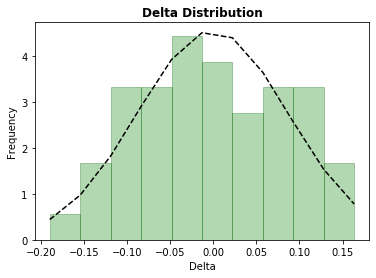

In [27]:

n, bins, patches = plt.hist(week_summary["WEEKLY_CHANGE"],
                   num_bins, density=True, color = 'green', 
                   edgecolor = 'darkgreen', alpha = 0.3)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

plt.plot(bins, y, '--', color ='black')

plt.xlabel('Delta')
plt.ylabel('Frequency')

plt.title('Delta Distribution',
          fontweight ="bold")


  
plt.show()

In [15]:
start_date.week # <- this is going to be off! need to add 1


AttributeError: 'str' object has no attribute 'week'

In [ ]:
week_summary

In [ ]:
sample_df[sample_df["WEEK_NUM"]==11].sort_values(by="DATE")

In [ ]:
nov_start = pd.to_datetime("2018-11-03")

In [ ]:
sample_df[sample_df["WEEK_NUM"]==45].sort_values(by="DATE")